# Problem 8: Detecting Flu Epidemics  via Search Engine Query Data 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The goal is to estimate influenza-like illness (ILI) activity using Google web search logs. 

ILI Data - The CDC publishes on its website the official regional and state-level percentage of patient visits to healthcare providers for ILI purposes on a weekly basis.


Google Search Queries - Google Trends allows public retrieval of weekly counts for every query searched by users around the world. For each location, the counts are normalized by dividing the count for each query in a particular week by the total number of online search queries submitted in that location during the week. Then, the values are adjusted to be between 0 and 1.

 
The dataset *Flu.csv* aggregates this data from January 1, 2004 until December 31, 2011

In [2]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/Flu.csv'
data = pd.read_csv(url)
data

,Week,ILI,Queries
0,2004-01-04 - 2004-01-10,2.418331,0.237716
1,2004-01-11 - 2004-01-17,1.809056,0.220452
2,2004-01-18 - 2004-01-24,1.712024,0.225764
3,2004-01-25 - 2004-01-31,1.542495,0.237716
4,2004-02-01 - 2004-02-07,1.437868,0.224436
...,...,...,...
412,2011-11-27 - 2011-12-03,1.465723,0.478088
413,2011-12-04 - 2011-12-10,1.518106,0.464807
414,2011-12-11 - 2011-12-17,1.663954,0.479416
415,2011-12-18 - 2011-12-24,1.852736,0.537849


**Data Description**

| Feature | Description |
| :- | -: |
| ILI| percentage of ILI-related physician visits for the corresponding week |
| Queries | fraction of queries that are ILI-related for the corresponding week, adjusted to be between 0 and 1 (higher values correspond to more ILI-related search queries |

In [3]:
y = data['ILI'].to_numpy()

Text(0.5, 0, 'weeks since 2004-01-04 -- 2004-01-10')

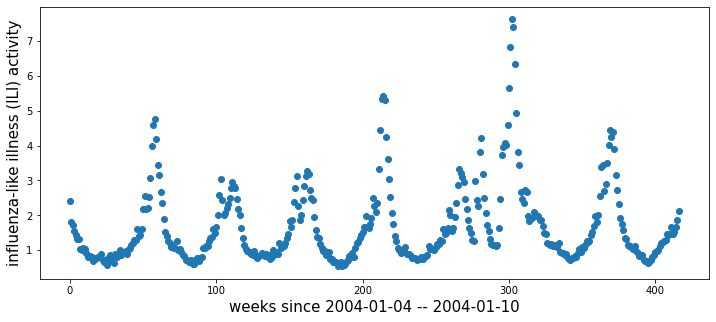

In [14]:
plt.figure(figsize=(12,5))
plt.plot(y,'o')
plt.ylabel('influenza-like illness (ILI) activity', fontsize=15)
plt.xlabel('weeks since 2004-01-04 -- 2004-01-10', fontsize=15)

The **goal** is to fit a linear regression model to predict the 'ILI' variable using the 'Queries' variables.

## Fitting a Linear Model

In [42]:
m = len(data)
m

417

In [43]:
features = ['Queries']
X = data[features].to_numpy()
X = np.c_[np.ones(m),X] # add bias

In [44]:
# fit a linear model to the data
theta = np.linalg.solve(X.T.dot(X),X.T.dot(y))

In [45]:
# use the linear model to predict the vector y
y_pred = X.dot(theta)

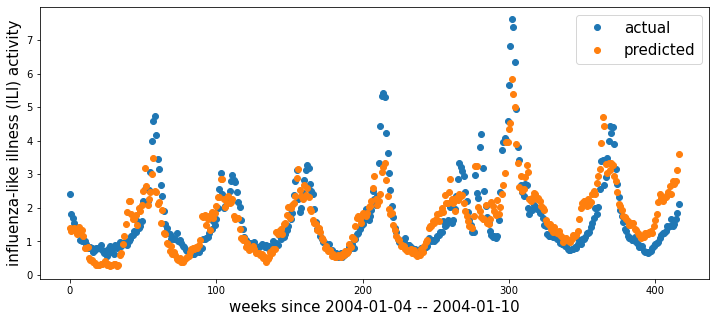

In [46]:
plt.figure(figsize=(12,5))
plt.plot(y,'o', label='actual')
plt.plot(y_pred,'o', label='predicted')
plt.ylabel('influenza-like illness (ILI) activity', fontsize=15)
plt.xlabel('weeks since 2004-01-04 -- 2004-01-10', fontsize=15)
plt.legend(fontsize=15)

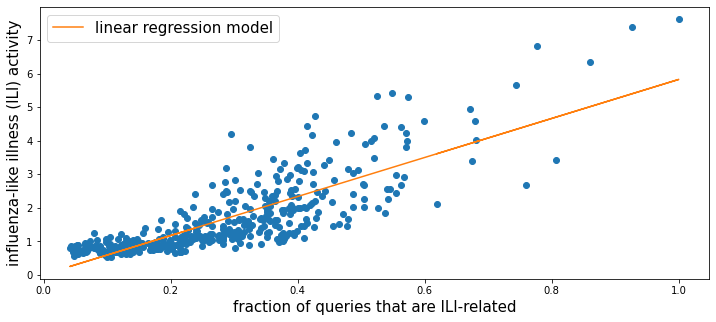

In [52]:
plt.figure(figsize=(12,5))
plt.plot(x,y,'o')
plt.ylabel('influenza-like illness (ILI) activity', fontsize=15)
plt.xlabel('fraction of queries that are ILI-related',fontsize=15)
plt.plot(x,y_pred,'-', label='linear regression model')
plt.legend(fontsize=15)

## Fitting a Polynomial Model

In [53]:
X = data[features].to_numpy()
m, n = X.shape

In [54]:
# scale the data
means = X.mean(axis=0) # mean along rows (axis=0)
s = X.std(axis=0) # standard deviation along rows
X = (X-means)/s # remove the mean and scale to unit variance

In [55]:
from itertools import chain
from itertools import combinations_with_replacement as comb_w_r

In [63]:
# number of polynomial features
degree = 2
combinations  = chain.from_iterable(comb_w_r(range(n), i) for i in range(1, degree+1))
n_poly = sum(1 for comb in combinations)
n_poly

2

In [64]:
# polynomial features
combinations  = chain.from_iterable(comb_w_r(range(n), i) for i in range(1, degree+1))
XP = np.ones((m,n_poly))
for col_idx,combination in enumerate(combinations):  
    for idx in combination:
        XP[:,col_idx]= XP[:,col_idx]*X[:,idx]

In [65]:
# add bias
XP = np.c_[np.ones(m),XP]

In [66]:
# fit a linear model to the data
theta = np.linalg.solve(XP.T.dot(XP),XP.T.dot(y))

In [67]:
# use the linear model to predict the vector y
y_pred = XP.dot(theta)

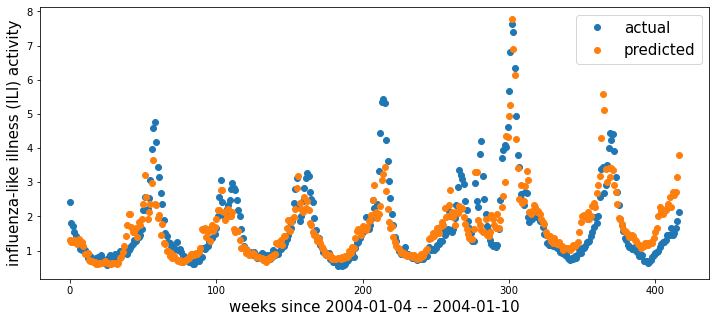

In [68]:
plt.figure(figsize=(12,5))
plt.plot(y,'o', label='actual')
plt.plot(y_pred,'o', label='predicted')
plt.ylabel('influenza-like illness (ILI) activity', fontsize=15)
plt.xlabel('weeks since 2004-01-04 -- 2004-01-10', fontsize=15)
plt.legend(fontsize=15)

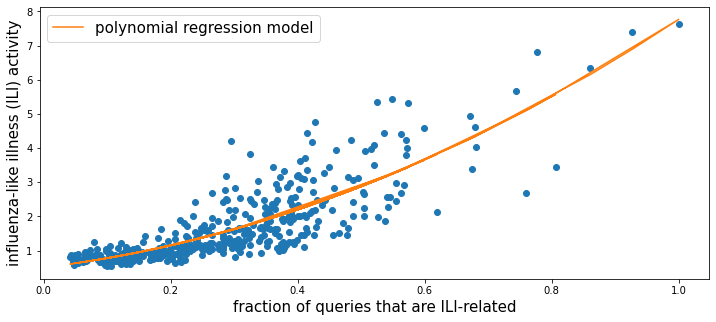

In [69]:
plt.figure(figsize=(12,5))
plt.plot(x,y,'o')
plt.ylabel('influenza-like illness (ILI) activity', fontsize=15)
plt.xlabel('fraction of queries that are ILI-related',fontsize=15)
plt.plot(x,y_pred,'-', label='polynomial regression model')
plt.legend(fontsize=15)